
# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2024/5.


Last updated: 2024-12-26


For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 311118780
~~~

~~~
STUDENT GIT LINK: https://github.com/MaorMoshe11
~~~
In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_[000000000].html`   




---


Imports:

In [1]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
your_drive_path_to_src_file = "/content/drive/MyDrive/Colab Notebooks/DL homeworks"
sys.path.append(your_drive_path_to_src_file)


In [4]:
from src import *

Note that now all of the network's objects from PS1 are loaded into the workspace.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.



1. convergence - Larger mini-batch size leads to more stable GD estimates. This is due to the update method, which relates to m- the batch size. As long as m is bigger, we can assume that the distribution of the sample will be similar to actual data. Hence, we will also see **smoother trajectory**
$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

  Respectively, smaller datasets can lead to slightly more noisy trajectory, but on the other hand, the update time will be faster.

2. Performance - smaller batches prevent overfitting since we use less data per epoch (and automaticli use more noise each update, this noise is umportant to reduce the overfit).

3. Computational Efficiency- Sicne mini-batch SGD is suited for parallel distributed proccesing, larger mini-batches can allow for grater parallelism.

To conclude, although the effects are known, there is a trade-off between batch sizes and for each problem and data we need to re-optimize. We can look at this A plot from Andrew-Ng's video emphasizes the effect of the mini-batch SGD.
  - The blue line represents the BGD with an update after each epoch, which is long but accurate straight to the minimum (optimistically)
  The purple line represents SGD, which shows changes after each data point. Hence, it's noisy, and you can lose the minimum point.
  - The green line is the perfect mini-batch, which is not too big or small and leads more consistently (but not to the minimum).




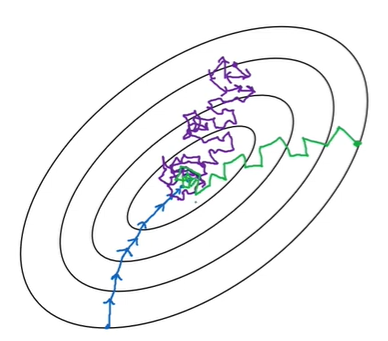

**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?



Mini-batch SGD requires a learning rate schedule because the gradient magnitude tends to decrease as training progresses, especially near the minimum. This occurs because gradients near the minimum are typically small in value (close to zero or at lest, smaller then 1), **and during backpropagation, these small values propagate through multiple layers, resulting in even smaller updates due to multiplication. This reduction in gradient magnitude slows the optimization process and can cause updates to become ineffective without a decreasing learning rate**. Additionally, smaller mini-batches introduce noise in the gradient estimates, and a learning rate schedule ensures stability and prevents oscillations or overshooting (=jumping back and forth across the minimum point). Common strategies include step decay, exponential decay, cyclical learning rates, and adaptive methods like Adam. Common strategies include step decay, exponential decay, cyclical learning rates, and adaptive methods like Adam.

Summary Table

| **Strategy**             | **Formula**                                | **Purpose**                                   |
|--------------------------|--------------------------------------------|-----------------------------------------------|
| Step Decay               | η(t) = η₀ * γ^(floor(t / k))              | Simple, easy to tune                          |
| Exponential Decay        | η(t) = η₀ * exp(-λ * t)                   | Smooth decay                                  |
| Cyclical Learning Rates  | Cycles η over time                        | Escaping sharp minima                         |
| Adaptive Methods         | Gradient-based adjustment                 | Automatically adapts to the problem           |





In the image below, you can see outputs shows number of strategies and theire different effects on the model's accuracy,[(found in meduim blogpost](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1))

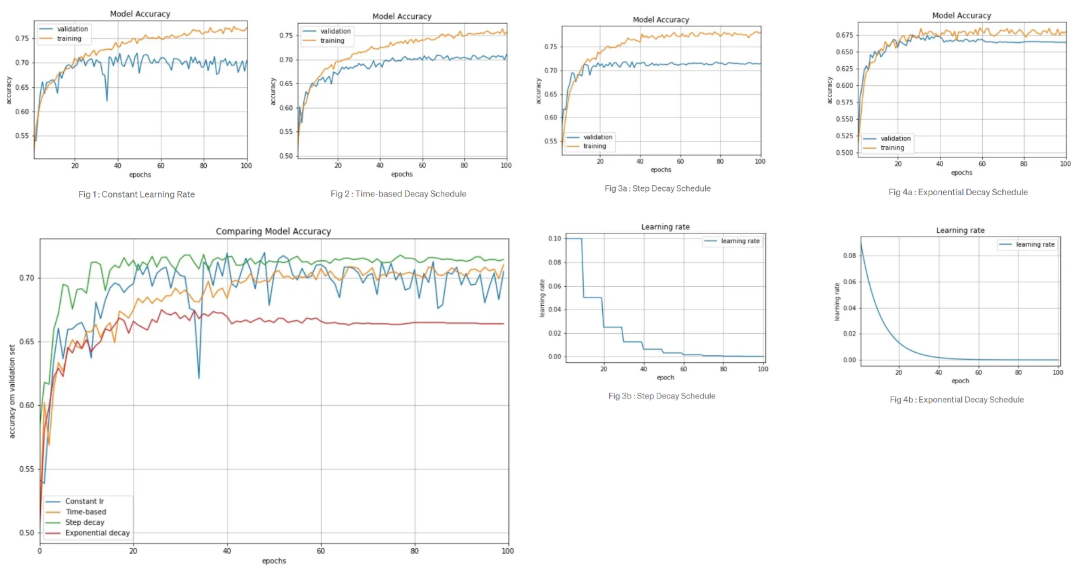

P1Q1c: What role does batch normalization play in mini-batch SGD, and why
is it essential for deep neural networks?


Train deep n.n is complicated by the fact that the distribution of eeach layer's input changes during training as the parameters of the previous layer change. This slows down the training by requiring lower training rats and causes extrem carful parametes initialization; we call it "covariance shift" (Ioffe and Szegedy, 2015 [link text](https://https://arxiv.org/pdf/1502.03167))


Batch Norm is a neural network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the following hidden layer.
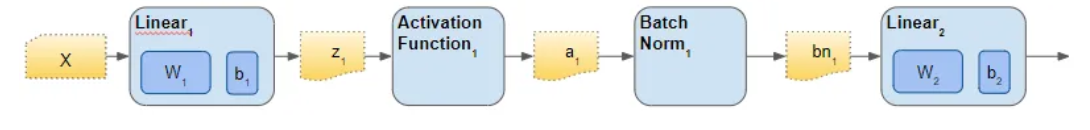


Just like the parameters (e.g. weights, bias) of any network layer, a Batch Norm layer also has parameters of its own: The moving average on the mean and variance are for the test samples,Beta  and Gamma are hyper-parameters learned throuthrough the N.N
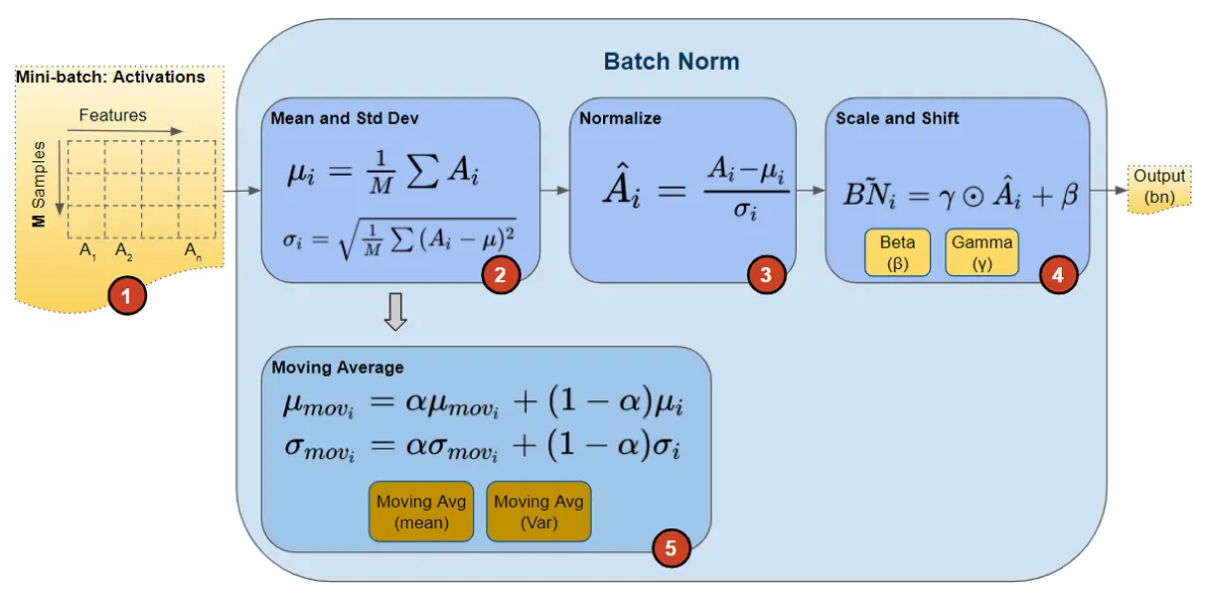

After the normalization, the values now have zero mean and unit variance, this prevent oscilations around the minmum


P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



The problem in non- convex optimization problems is that it is possible to have many local minima and saddle points. When using full batch gradient descent over non convex problem we could converge to local minima, and not a global minima, and we are very depend on the starting point. When using a mini-batch SGD, because the variance is high we can skip over a local minima (or saddle point) and the probability to get to global minima instead is higher, it "explores" the solution landscape better. This tradeoff sometime can be called Exploration Vs Exploiotation and it's shown graphicaly by the lines in P1Q1 answer

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



In imbalanced datasets, the distribution of samples across different classes is skewed. For example, a dataset might have 95% of samples belonging to one class and only 5% to another. This imbalance can cause mini-batch SGD to prioritize the majority class during training.

Due to the uneven distribution, mini-batches are likely to contain more samples from the majority class. This leads to the model primarily focusing on minimizing errors for the majority class, potentially neglecting the minority class and resulting in poor performance on it.

To address this issue, techniques like oversampling (the minority class), undersampling (the majority class), class weighting, and focal loss can be employed to rebalance the dataset or adjust the learning process to give more weight to the minority class.

P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


During inference, the goal is to efficiently compute predictions rather than update model parameters. Larger mini-batch sizes are preferred because they allow for processing multiple data points simultaneously, leveraging parallelism to speed up computations and produce consistent outputs that reflect expected predictions. This is particularly beneficial in real-time applications or when dealing with large datasets.

### Applying mini-batch SGD

Preparing the data:

In [6]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [8]:
def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate):
    """
    Trains the network using mini-batch gradient descent.

    Parameters:
      x_train : np.array
          Training data.
      y_train : np.array
          Training labels.
      batch_size : int
          Size of each mini-batch.
      epochs : int
          Number of training epochs.
      learning_rate : float
          Learning rate for updating the weights.
    """
    ## MISSING ##
    samples = len(x_train)
    num_batches = samples // batch_size
    print("Training on {:,} samples with batch size {:,}:".format(samples, batch_size))

    for epoch in range(1, epochs+1):
        err = 0
        indices = np.random.permutation(samples) #shuffle the train data at start of each epoch
        x_train_shuffled = x_train[indices]
        y_train_shuffled = y_train[indices]

        current_lr = learning_rate / (1 + 0.1 * epoch)

        for b in range(num_batches):
            start = b * batch_size
            end = start + batch_size
            x_batch = x_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]
            batch_err = 0

            #Forward pass for the entire batch
            outputs = []
            for i in range(len(x_batch)):
                output = x_batch[i]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                outputs.append(output)

            outputs = np.array(outputs)
            batch_loss = np.mean([self.loss(y_batch[j], outputs[j]) for j in range(batch_size)])
            err += batch_loss

            #Backward pass for the entire batch
            for j in range(len(x_batch)):
                grad = self.loss_grad(y_batch[j],outputs[j])
                for layer in reversed(self.layers):
                    grad = layer.backward_propagation(grad,current_lr)

        err = err/num_batches
        print(f"Epoch {epoch + 1}/{epochs} - Error: {err:.4f} - Learning Rate: {current_lr:.6f}")



    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [9]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()


netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.041982
Training epoch 2/10   error=0.023472
Training epoch 3/10   error=0.018073
Training epoch 4/10   error=0.015185
Training epoch 5/10   error=0.013198
Training epoch 6/10   error=0.011666
Training epoch 7/10   error=0.010430
Training epoch 8/10   error=0.009414
Training epoch 9/10   error=0.008567
Training epoch 10/10   error=0.007848
Total process time: 77.264


In [10]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0116, Accuracy: 9396/10000 (94%)



In [11]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()


netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))

netMiniGD.use_loss(mse, mse_grad)


epoch_num = 10
lr_sched = 0.05 # add a learning rate scheduler of your choice here
t2 = time.time()
netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=lr_sched)
print(f"Total process time: {round(time.time() - t2,3)}")


trininng on 10,000 samples with batch size 128:
Epoch 10/10   Error=0.008811
Total process time: 67.96


In [12]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0128, Accuracy: 9409/10000 (94%)



P1Q2b:   
Please answer the following:
* Which implementation was faster?
* with lower training error?
* with better test accuracy?    

and explain how these results fit your answers in Q1A.

ANSWER.  
The Mini-batch SGD was faster, with slightly higher training error, and slightly better test accuracy. This aligns well with prior statements and with the observations in Q1A. Recall that in Q1A, we examined two extreme cases for |B| (batch size) and demonstrated their effects. In this case, |B| = 128, resulting in 8 batches. This is neither close to the size of the training set (as in Batch SGD) nor to 1 (as in Regular SGD). Consequently, this value of |B| provided a sufficient to improve over Regular SGD. I believe that exploring various learning rate schedules could further enhance performance.

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [27]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [30]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [8]:
### MISSING: SOLUTION REQUIRED IN THIS CODE BLOCK

class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None
        self.filter_number = num_filters


        # Initialize the Convolution layer filters
        ## SOLUTION REQUIRED!!
        #init the wights for filters
        self.filters = np.random.randn(num_filters, size, size) * 0.1



    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch,h,w = image.shape

        for y in range(0,h-self.size+1):
            for x in range(0,w-self.size+1,self.stride):
                ## SOLUTION REQUIRED!!
                patch = image[ : , y:y+self.size , x:x+self.size ]
                yield patch, y, x


    def forward_propagation(self, image):
        # Calculate the convolution forward pass using the filters together with a
        # user specified activation function.

        # If this is the first convolution layer, the input image is size (h,w) and must be expanded to (c,h,w).
        if len(image.shape)==2:
            image = np.expand_dims(image, axis=0)
        # keep track of last input for later backward propagation
        self.last_input = image
        # Initializing the output array:
        ## SOLUTION REQUIRED!!
        input_dimension = image.shape    # the dimension of the input (current) image
        w2 = image.shape[1] - self.size + 1
        h2 = image.shape[1] - self.size + 1
        output_dimension = (w2,h2,self.filter_number)

        # compute output dimensions after the convolution layer
        output = np.zeros((self.filters.shape[0], output_dimension[0], output_dimension[1]))

        # forward pass on each filter
        for f in range(self.filters.shape[0]): #along the number of channels
            for patch, y, x in self.patch_generator(image):
                ## SOLUTION REQUIRED!!
                output[f,y, x] = np.sum(patch*self.filters[f]) #the convolve action

        # Applying activation function (this is a small cheat/simplification
        #  because the activation should be a separate layer in itself.  )
        if self.activation is not None:
            output = self.activation.forward_propagation(output)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the SGD in-gradients of the filters and the layer.
        # Update only the filters gradients.

        # back propagate through activation (again, a bit of a cheat)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out,learning_rate)

        ## SOLUTION REQUIRED!!
        grad_in = np.zeros(self.last_input.shape)     # loss gradient of the input
        grad_filter = np.zeros(self.filters.shape) # loss gradient of filter


        for f in range(self.filters.shape[0]): #itreate through ech layer in the conv layer
            for patch, y, x in self.patch_generator(self.last_input):
                ## SOLUTION REQUIRED!!
                grad_filter[f] += grad_out[f, y, x] * patch[0]  # calculate the gradient of the filter
                grad_in[:, y:y + self.size, x:x + self.size] += grad_out[f, y, x] * self.filters[f] # calculate the gradient of input


        ## SOLUTION REQUIRED!!
        self.filters -=  grad_filter * learning_rate# update filters using SGD
        return grad_in    # return the loss gradient for this layer's inputs


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [9]:
### MISSING CODE IN THIS BLOCK

class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

        for c in range(ch):
          for y in range(0,h-self.size+1):
              for x in range(0,w-self.size+1,self.stride):
                  patch = image[c ,y:y+self.size ,x:x+self.size ]
                  yield patch, c, y, x

    def forward_propagation(self, image):
        # keep track of last input for later backward propagation
        self.last_input = image

        # compute output dimensions after the max pooling
        num_channels, h_prev, w_prev = image.shape
        ## SOLUTION REQUIRED!!
        h_new = (h_prev-self.size)//self.stride +1
        w_new = (w_prev-self.size)//self.stride+1
        # hold the values of the max pooling
        output = np.zeros((num_channels, h_new, w_new))

        # Calculate the max pool on all the image patches using the generator:
        # CODE MISSING
        for patch, c, y, x in self.patch_generator(image):
            output[c ,y, x] = np.max(patch)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the gradients of the last input image
        num_channels, orig_dim, *_ = self.last_input.shape
        grad_in = np.zeros(self.last_input.shape)

        # Using the generator, go over all the channels and calcualte the max-pooling input gradients
        # for c in range(num_channels):
        for patch, c, y, x in self.patch_generator(self.last_input):
            max_y, max_x = np.unravel_index(np.nanargmax(patch), patch.shape)
            ## SOLUTION REQUIRED!!
            grad_in[c, y+max_y, x+ max_x] += grad_out[c, y, x]


        return grad_in


### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [10]:
### MISSING CODE IN THIS BLOCK ####
class Reshape:
    def __init__(self,input_shape,output_shape):
        self.input_shape=input_shape
        self.output_shape=output_shape
    def forward_propagation(self,input_data):
        ## SOLUTION REQUIRED!!
        # return MISSING (use np.reshape)
        return input_data.reshape(self.output_shape)

    def backward_propagation(self,output_gradient,learning_rate):
        # you can ignore the learning_rate
        ## SOLUTION REQUIRED!!
        # return MISSING (use np.reshape)
        return output_gradient.reshape(self.input_shape)


### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  

###  Summary of Shapes (Up to the First Affine Layer)
| **Layer**             | **Input Shape**     | **Output Shape**      | **Explanation**                                                                 |
|------------------------|---------------------|-----------------------|---------------------------------------------------------------------------------|
| Input Layer            | \( (1, 28, 28) \)  | \( (1, 28, 28) \)     | Initial input image.                                                           |
| Convolutional Layer    | \( (1, 28, 28) \)  | \( (12, 26, 26) \)    | Convolution with 12 filters of size \( 3 \times 3 \).                          |
| Max Pooling Layer      | \( (12, 26, 26) \) | \( (12, 24, 24) \)    | Max pooling with a window of size \( 3 \times 3 \).                            |
| Reshape Layer          | \( (12, 24, 24) \) | \( (1, 6912) \)       | Flattening the output to prepare for the affine layer.                         |
| First Affine Layer     | \( (1, 6912) \)    | \( (1, 128) \)        | Fully connected layer with 128 neurons.                                        |
"""


ANSWER HERE

In [19]:
# MISSING CODE HERE

P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [20]:
#### SOLUTION REQUIRED IN THIS BLOCK (in  reshape parameters) ####

# Network Architecture
CNNnet = MyNetwork()
num_classes = 10
# Reshape sizes:
## SOLUTION REQUIRED!!
c = 12 # output channels
x_new = 24
y_new = 24


# Adding convolution and max-pool layers:
CNNnet.add(Convolution(num_filters=12, size=3,
                    activation=ActivationLayer(relu, relu_grad))) #
CNNnet.add(MaxPool(size=3))

# Reshaping for first affine layer:
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))

# Adding affine layers and activation functions:
CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))

# CNNnet.add(ActivationLayer(relu, relu_grad))
# CNNnet.add(ActivationLayer(tanh, tanh_grad))
# CNNnet.add(ActivationLayer(sigmoid, sigmoid_grad))

### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [21]:
import time
# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 5 #20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:500], y_train[:500], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 500 samples:
Training epoch 1/5   error=0.073179
Training epoch 2/5   error=0.046742
Training epoch 3/5   error=0.038893
Training epoch 4/5   error=0.034283
Training epoch 5/5   error=0.030941
Total process time: 962.178


Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [22]:
CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)


Training on 100 samples:
Training epoch 1/4   error=0.030788
Training epoch 2/4   error=0.024239
Training epoch 3/4   error=0.020887
Training epoch 4/4   error=0.018384
         128778981 function calls in 229.082 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6499200    4.965    0.000    4.965    0.000 <ipython-input-16-3ef9c7d65d59>:23(patch_generator)
      400   11.800    0.030   32.373    0.081 <ipython-input-16-3ef9c7d65d59>:36(forward_propagation)
      400   35.419    0.089   37.895    0.095 <ipython-input-16-3ef9c7d65d59>:67(backward_propagation)
  5530400    5.423    0.000    5.423    0.000 <ipython-input-17-bc9e1e549591>:11(patch_generator)
      400    3.712    0.009   21.205    0.053 <ipython-input-17-bc9e1e549591>:22(forward_propagation)
      400   26.745    0.067  135.257    0.338 <ipython-input-17-bc9e1e549591>:40(backward_propagation)
      400    0.001    0.000    0.003    0.000 <ipython-input-18-6b2e7

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

The implementation is slow because if we have data with shape $n$, on each data point with shape  
$(h, w)$ we run $f$ filters with shape $k \times k$ which takes $k^2$ for almost each pixel.

This is only the convolution layer running time, which in total takes  
$O(n \cdot h \cdot w \cdot k^2 \cdot f)$.  

Moreover, we have the rest of the layers, which have a smaller running time, so in total we can say that the running time is around  
$O(n \cdot h \cdot w \cdot k^2 \cdot f)$.


### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [23]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0499, Accuracy: 423/500 (85%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [32]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

t_train =  TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train).squeeze(1))
t_test =  TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test).squeeze(1))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)
print("Shape of t_train features:", t_train.tensors[0].shape)  # x_train shape
print("Shape of t_train labels:", t_train.tensors[1].shape)    # y_train shape
print("Shape of t_test features:", t_test.tensors[0].shape)    # x_test shape
print("Shape of t_test labels:", t_test.tensors[1].shape)

Shape of y_train: (60000, 1, 10)
Shape of y_test: (10000, 1, 10)
Shape of t_train features: torch.Size([60000, 1, 28, 28])
Shape of t_train labels: torch.Size([60000, 10])
Shape of t_test features: torch.Size([10000, 1, 28, 28])
Shape of t_test labels: torch.Size([10000, 10])


Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [33]:
#### SOLUTION REQUIRED  IN THIS BLOCK####

class PyTorchCNN(nn.Module):
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        self.input_size = 28
        self.num_classes = 3
        self.c = 12
        # SOLUTION REQUIRED
        self.conv = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride = 1)
        self.reshape = nn.Flatten()
        conv_output_size = self.input_size-4
        flattened_size = conv_output_size * conv_output_size * self.c
        self.affine1 = nn.Linear(flattened_size, 128)
        self.affine2 = nn.Linear(128, 64)
        self.affine3 = nn.Linear(64, 10)
        self.activation = nn.Tanh()

    def forward(self, x):
        # x = x.view(1, 28,28 )
        x =  self.conv(x)
        x = self.maxpool(x)
        x = self.reshape(x)
        x = self.affine1(x)
        x = self.activation(x)
        x= self.affine2(x)
        x = self.activation(x)
        x = self.affine3(x)
        x = self.activation(x)
        return x

In [34]:
# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        # reshaping the labels to match the samples
        labels = labels
        outputs = pt_network(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [500/938], Loss: 0.0190
Epoch [2/10], Step [500/938], Loss: 0.0111
Epoch [3/10], Step [500/938], Loss: 0.0127
Epoch [4/10], Step [500/938], Loss: 0.0244
Epoch [5/10], Step [500/938], Loss: 0.0160
Epoch [6/10], Step [500/938], Loss: 0.0099
Epoch [7/10], Step [500/938], Loss: 0.0126
Epoch [8/10], Step [500/938], Loss: 0.0216
Epoch [9/10], Step [500/938], Loss: 0.0128
Epoch [10/10], Step [500/938], Loss: 0.0115


Evaluation:

In [35]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0002, Accuracy: 9362/10000 (94%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

Write your solutions here:

1. My model achieved 85% accuracy with only 5 epochs and 500 training samples, whereas the PyTorch model reached 94% accuracy. But, PyTorch did it with 10 epochs and the full dataset (since it's 10 times faster then it can preform so many claculation in less time and do not cause a crash, this is what makes it so powerful). given the constraints, my manual model wasn't bad but offcousr the second is significantly better.

2. The PyTorch model was faster due to its optimized memory management and efficient computation.

3. I would replace tanh with softmax for better classification performance.

4. Implementing an adaptive learning rate could improve convergence speed and precision.

---

## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

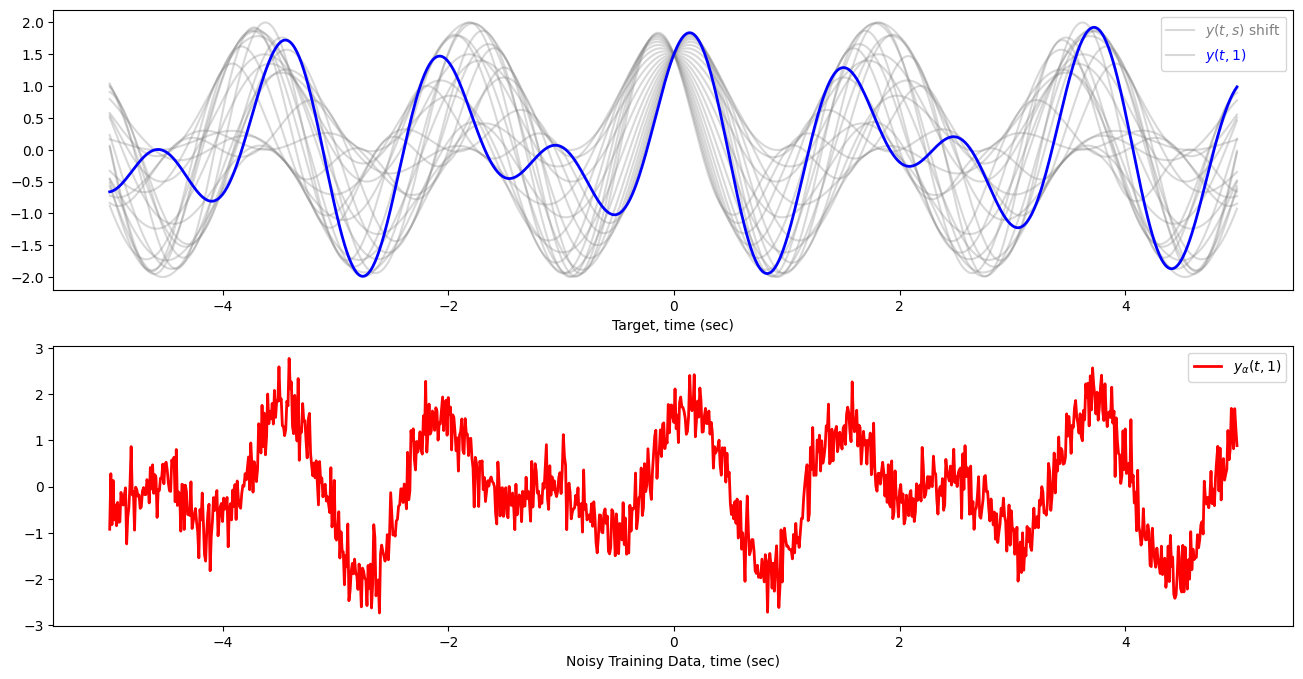

In [30]:
## SOLUTION REQUIRED IN THIS BLOCK ##

## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.) # line space
alpha = 0.4
## Creating a function to produce cyclical y data.
y_func = lambda s: np.sin(np.sin(s)*2*np.pi*t_line + np.pi/6) + np.cos(2*np.sqrt(3)*t_line)
y = y_func(1)
## Adding noise
y_noisy = y + np.random.randn(len(t_line))*alpha


## Plotting
fig, ax = plt.subplots(2,1, figsize=(16,8))
fval = np.arange(-1,1,0.1)

for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=.3,label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw = 2,label = "fixed $f$",color="b")
ax[0].set_xlabel('Target, time (sec)')
ax[1].plot(t_line, y_noisy, lw = 2,c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')
ax[0].legend(["$y(t,s)$ shift","$y(t,1)$"],labelcolor=["gray","b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [31]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [32]:

# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

In [33]:
## SOLUTION REQUIRED IN THIS BLOCK##

# As above, creating a simulated data generator from our function (not noisy)
# this time, the function should depend on "step" as well (x_line is ever changing).

y_func = lambda s,t: np.sin(np.sin(s)*2*np.pi*t + np.pi/6) + np.cos(2*np.sqrt(3)*t)



In [34]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


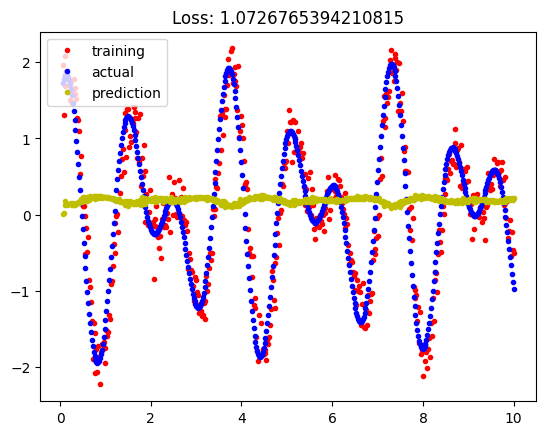

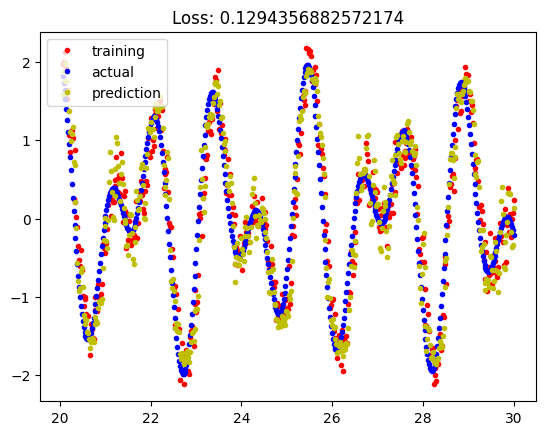

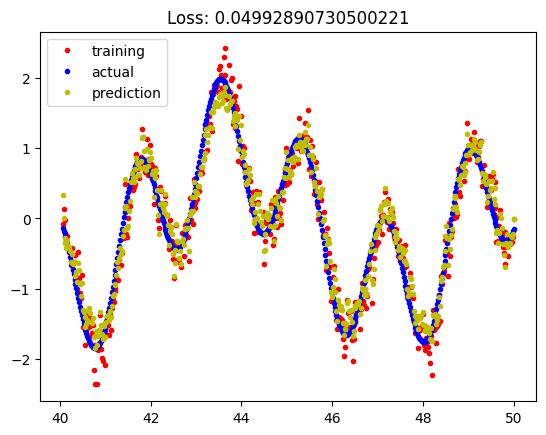

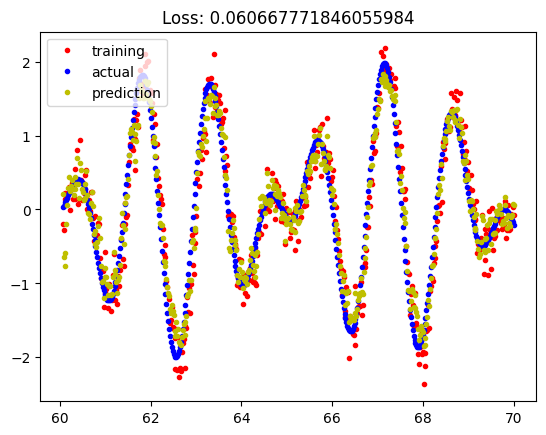

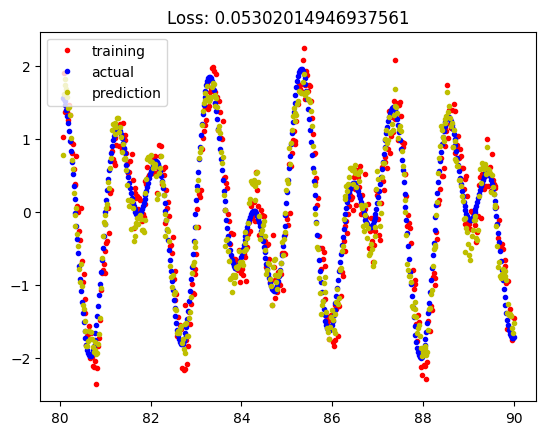

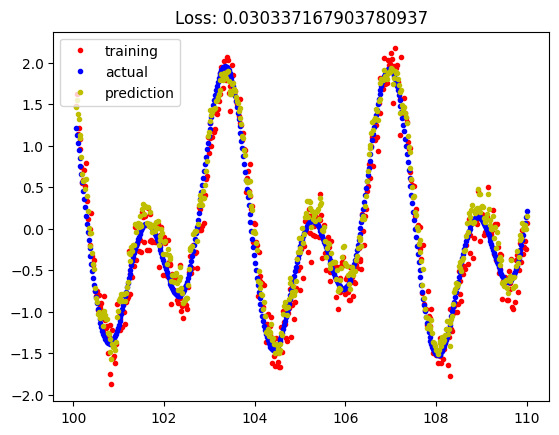

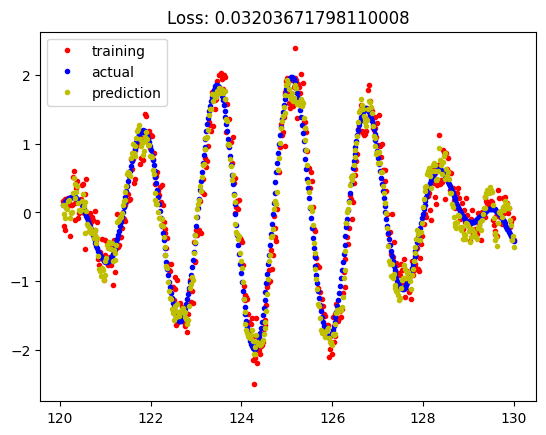

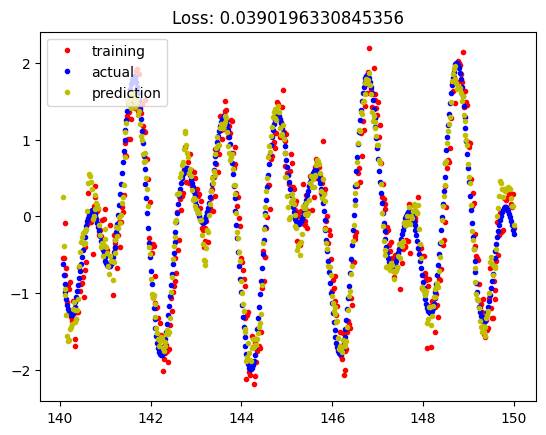

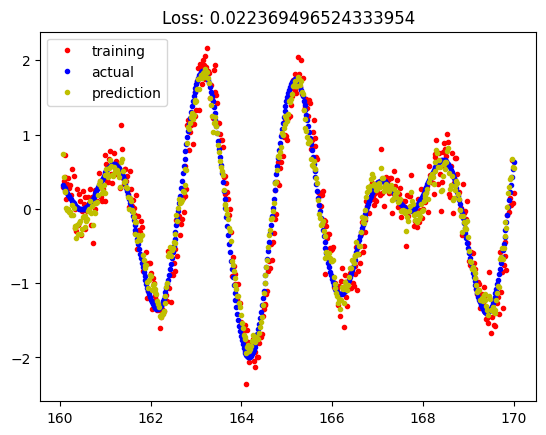

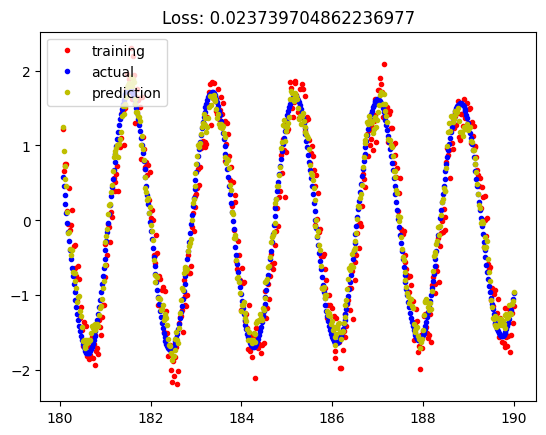

In [35]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

##### (a) Model Performance
The model’s performance depends on its ability to learn temporal dependencies while generalizing well to unseen data. If the training accuracy is significantly higher than validation accuracy, overfitting might be an issue. Given the current settings, a moderate noise level (α), appropriate sequence length, and a well-tuned lag value should allow the model to capture relevant dependencies without excessive overfitting.

#####(b) Hyperparameter Relationships and Their Effects on RNN Performance
Several hyperparameters govern the RNN's learning behavior and must be carefully balanced:

**n_steps**: Defines the number of training iterations. A high number can lead to overfitting, while a low number might result in underfitting and poor convergence.
**stride**: Determines the spacing between consecutive time points. A small stride helps capture rapid fluctuations, but too small a value may cause redundancy, increasing overfitting. A large stride may miss important variations in fast-changing sequences.
**seq_length**: Controls the length of the training sequences. Longer sequences capture long-term dependencies but increase computational complexity. Shorter sequences focus on local dependencies but may fail to learn global trends. A trade-off must be considered based on the nature of the data.
**lag**: Defines how long past information influences future predictions. A higher lag allows the model to capture long-term dependencies, which is useful for datasets where distant past states impact future values. However, excessive lag values may introduce noise and complicate learning.
**alpha**: Represents the standard deviation of added noise. Higher noise levels prevent overfitting but make learning the underlying function harder. Lower noise results in a more precise model but increases overfitting risk.
print_every: Affects training monitoring by setting intervals for displaying progress, which helps in debugging but does not impact the model’s final performance.

##### (c) Real-World Application
Recurrent Neural Networks are widely used in time-series forecasting. Few month ago i tried to forcast CyanoBactries spread in the kinneret lake with RNN, It didn't end well because i did not have enough data. Moreover, i belive RNN can be usful in prices prediction or demand prediction



##### (d) Model Improvements
Several architectural modifications could enhance model performance:

- Bidirectional RNN: This allows the model to leverage both past and future contexts for each time step, improving sequential pattern recognition. However, it increases computational overhead and can lead to overfitting.

- Dropout Regularization: Helps mitigate overfitting by randomly deactivating neurons during training, forcing the model to generalize better.
- Adaptive Learning Rate: Implementing learning rate decay or Adam optimizer can help the model converge faster and avoid local minima.
- Attention Mechanism: Introducing attention layers would improve long-term dependency learning by focusing on the most relevant parts of the sequence, especially useful in long time-series or NLP tasks.


ANSWER MISSING

THE END!

In [ ]:
#make this code html page
